In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from __future__ import division
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import cv2



# Foto grande

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
%matplotlib inline
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 6, 6


In [6]:
imgX = Image.open("MArylin.JPG")  # open colour image
imgX = imgX.convert('L')
img = np.asarray(imgX)
img = 2*(img > 128).astype(int)-1

In [7]:
img

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

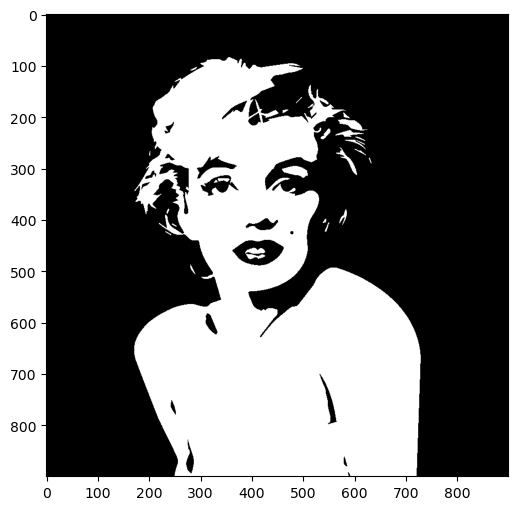

In [8]:

plt.imshow(img,cmap='gray',vmin=-1,vmax=1)
plt.show()

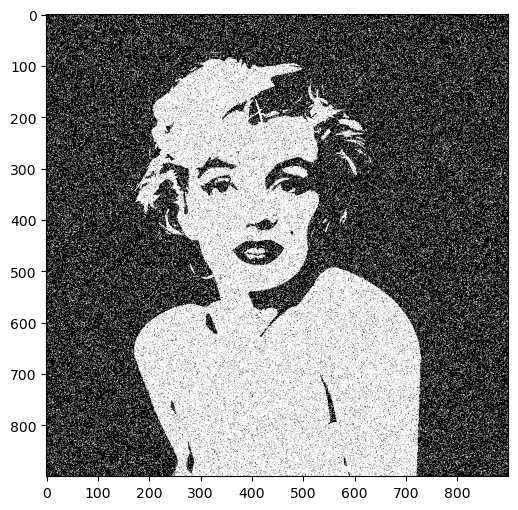

In [9]:

#create a noisy binary image
noise = np.random.random(img.shape)
noise = where(noise<0.15,-1,1)
Y = np.array(img*noise) #observed noisy binary image.

height,width = Y.shape
N = height*width

imgplot = plt.imshow(Y, cmap = cm.Greys_r)
plt.show()

# **ICM**

In [10]:
import time

# Start the timer
start_time = time.time()

# Block of code to be timed


sigma_squared = 1
N = height*width

beta = 0.8 # for arbitrary parameters that reflects our prior belief
eta = 1 # coefficient for correlation between x and y

T = 6000000 # sufficient number of steps to converge stationary distribution

X = Y.copy()

errorM= np.zeros(T)

 # Initialize Z from X
for t in range(T):
    i,j = np.random.choice(height), np.random.choice(width) # randomly choose a coordinate (i,j)
    
    enPos =  -beta*(np.sum(X[max(i-1,0) : i+1, max(j-1,0) : j+1]) * 1)
    enPos += -eta*Y[i,j]*1
    #X=1
    #enPos=-energy+(0.5/sigma_squared)*(Y[i,j]-1)**2
    enNeg =  -beta*(np.sum(X[max(i-1,0) : i+1, max(j-1,0) : j+1]) * -1)
    enNeg += -eta*Y[i,j]*(-1)
    #X=-1
    #enNeg=+energy+(0.5/sigma_squared)*(Y[i,j]+1)**2

    if(enPos<=enNeg):
      X[i,j]=1
    else:
      X[i,j]=-1

    #errore
    errorM[t]=np.sum(img != X)


# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Elapsed time: {elapsed_time} seconds")

KeyboardInterrupt: 

tempo sbagliato, ricalcola

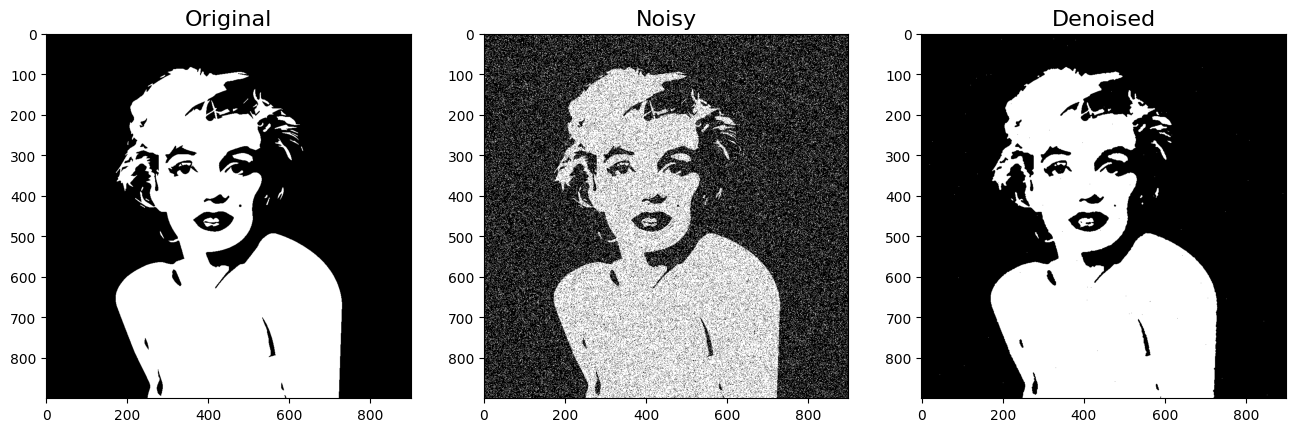

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(img,cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Original", fontsize=16)
ax[1].imshow(Y,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Noisy", fontsize=16)
ax[2].imshow(X,cmap='gray',vmin=-1,vmax=1)
ax[2].set_title("Denoised", fontsize=16)
plt.show()

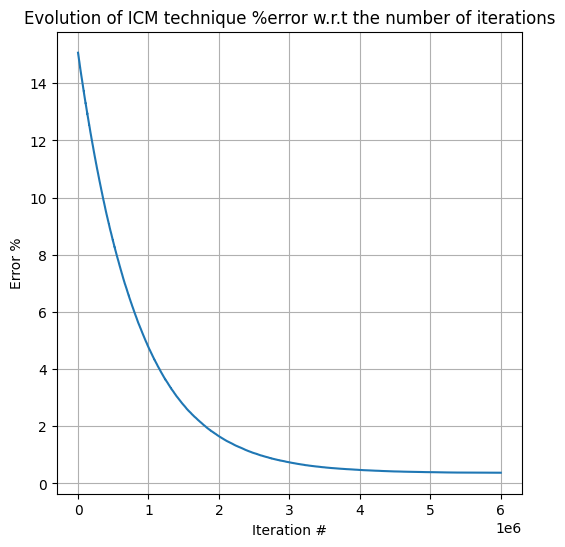

In [ ]:

x = np.linspace(0, T, T)
# Plot the array against x
plt.plot(x, (errorM*100/(width*height)))
plt.xlabel('Iteration #')
plt.ylabel('Error %')
plt.title('Evolution of ICM technique %error w.r.t the number of iterations')
plt.grid(True)
plt.show()

In [ ]:
errorM[5999999]*100/N

0.37530864197530867

In [ ]:
np.save('arrayICM.npy',errorM)
np.save('imageICM.npy', X)

tempo vero

In [16]:
import time

# Start the timer
start_time = time.time()

# Block of code to be timed


sigma_squared = 1
N = height*width

beta = 1.2 # for arbitrary parameters that reflects our prior belief
eta = 1.8
T = 6000000 # sufficient number of steps to converge stationary distribution

X = Y.copy()

for eta in np.linspace(0.5, 5, 10):
  for beta in np.linspace(0.5, 5, 10):
    
    # Initialize Z from X
    for t in range(T):
        i,j = np.random.choice(height), np.random.choice(width) # randomly choose a coordinate (i,j)
        #energy =  beta*(np.sum(X[max(i-1,0):i+2,max(j-1,0):j+2]) - X[i,j])
        #X=1
        #enPos=-energy+(0.5/sigma_squared)*(Y[i,j]-1)**2
        #X=-1
        #enNeg=+energy+(0.5/sigma_squared)*(Y[i,j]+1)**2

        enPos =  -beta*(np.sum(X[max(i-1,0) : i+1, max(j-1,0) : j+1]) * 1)
        enPos += -eta*Y[i,j]*1
        #X=1
        #enPos=-energy+(0.5/sigma_squared)*(Y[i,j]-1)**2
        enNeg =  -beta*(np.sum(X[max(i-1,0) : i+1, max(j-1,0) : j+1]) * -1)
        enNeg += -eta*Y[i,j]*(-1)

        if(enPos<=enNeg):
          X[i,j]=1
        else:
          X[i,j]=-1
  errorM=np.sum(img != X)
  print(f"Error for eta = {eta} and beta = {beta} is: {errorM}")

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Elapsed time: {elapsed_time} seconds")

Error for eta = 0.5 and beta = 5.0 is: 28507
Error for eta = 1.0 and beta = 5.0 is: 28491
Error for eta = 1.5 and beta = 5.0 is: 28901


KeyboardInterrupt: 

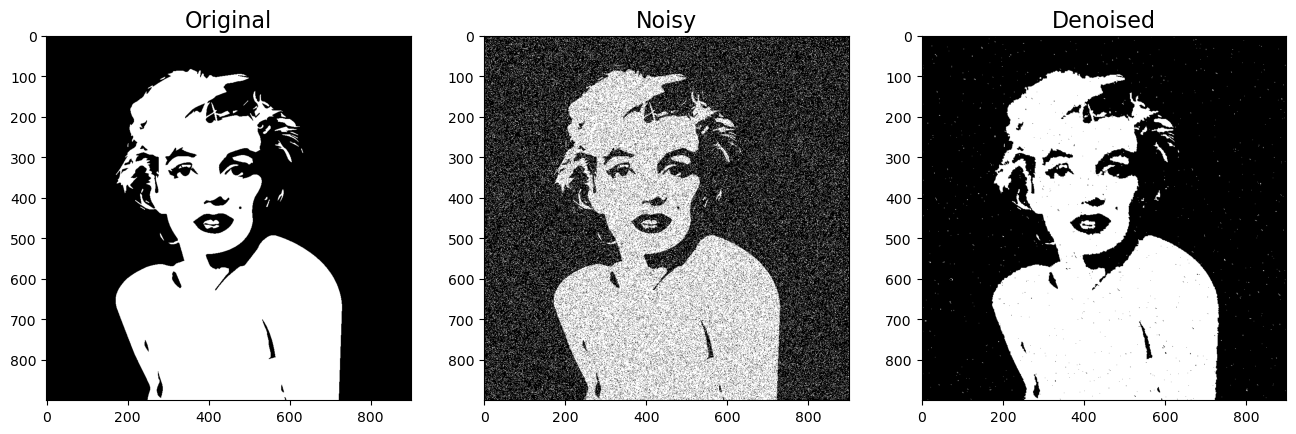

In [14]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(img,cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Original", fontsize=16)
ax[1].imshow(Y,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Noisy", fontsize=16)
ax[2].imshow(X,cmap='gray',vmin=-1,vmax=1)
ax[2].set_title("Denoised", fontsize=16)
plt.show()